<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Age" data-toc-modified-id="Age-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Age</a></span></li><li><span><a href="#Planets" data-toc-modified-id="Planets-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Planets</a></span></li><li><span><a href="#СryoSleep" data-toc-modified-id="СryoSleep-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>СryoSleep</a></span></li><li><span><a href="#Destination" data-toc-modified-id="Destination-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Destination</a></span></li><li><span><a href="#VIP" data-toc-modified-id="VIP-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>VIP</a></span></li><li><span><a href="#Cabin" data-toc-modified-id="Cabin-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Cabin</a></span></li><li><span><a href="#RoomService,-FoodCourt,-ShoppingMall,-Spa,-VRDeck" data-toc-modified-id="RoomService,-FoodCourt,-ShoppingMall,-Spa,-VRDeck-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>RoomService, FoodCourt, ShoppingMall, Spa, VRDeck</a></span></li><li><span><a href="#Preprocessing-for-machine-learning" data-toc-modified-id="Preprocessing-for-machine-learning-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Preprocessing for machine learning</a></span></li><li><span><a href="#Model-Predections" data-toc-modified-id="Model-Predections-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Model Predections</a></span></li></ul></div>

# 🛠️  Import Libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import scipy
from scipy import stats

#import json 
import sklearn
#import re

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
#from sklearn.model_selection import cross_val_score, KFold

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#import xgboost as xgb
#from xgboost import plot_tree

import warnings
warnings.filterwarnings('ignore')

# 🛠️ Painting environment setting

In [2]:
palette=sns.color_palette('winter_r', 4)
sns.set_style('darkgrid')

# Load the dataset 

In [3]:
try:
    train_spacy = pd.read_csv('D:/Common Vika/2022/kaggle/train.csv')
    df = train_spacy.copy()
    test = pd.read_csv('D:/Common Vika/2022/kaggle/test.csv')
except:
    train_spacy = pd.read_csv('C:/Users/vdavy/Desktop/pet-project/spaceship-titanic/train.csv')
    df = train_spacy.copy()
    test = pd.read_csv('C:/Users/vdavy/Desktop/pet-project/spaceship-titanic/test.csv')
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
test = pd.read_csv('C:/Users/vdavy/Desktop/pet-project/spaceship-titanic/test.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


train.csv - personal records of about two-thirds (~8700) of the passengers that will be used as training data.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
df.describe().style.background_gradient(cmap='BuPu')

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [7]:
test.describe().style.background_gradient(cmap='BuPu')

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


# 📋 Data processing

The purpose of the data cleaning is:

-  Handle with missing values
-  Remove some outliers in numerical features
- Standardized data format

In [8]:
#research zero value
def info_column(df):
    for column in df.columns:
        print('----%s----'%column)
        print('Type is: ',df[column].dtype)
        print('Number is null values:', df[column].isna().sum())    
info_column(df)
print()
info_column(test)

----PassengerId----
Type is:  object
Number is null values: 0
----HomePlanet----
Type is:  object
Number is null values: 201
----CryoSleep----
Type is:  object
Number is null values: 217
----Cabin----
Type is:  object
Number is null values: 199
----Destination----
Type is:  object
Number is null values: 182
----Age----
Type is:  float64
Number is null values: 179
----VIP----
Type is:  object
Number is null values: 203
----RoomService----
Type is:  float64
Number is null values: 181
----FoodCourt----
Type is:  float64
Number is null values: 183
----ShoppingMall----
Type is:  float64
Number is null values: 208
----Spa----
Type is:  float64
Number is null values: 183
----VRDeck----
Type is:  float64
Number is null values: 188
----Name----
Type is:  object
Number is null values: 200
----Transported----
Type is:  bool
Number is null values: 0

----PassengerId----
Type is:  object
Number is null values: 0
----HomePlanet----
Type is:  object
Number is null values: 87
----CryoSleep----
Type is

In [9]:
df['Transported'].value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

We observe approximately the same distribution in values

## Age 

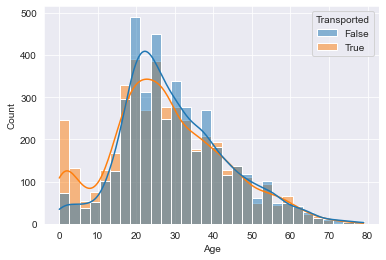

In [10]:
sns.histplot(data = df,x = 'Age', hue ='Transported', kde = True, bins = 30 );

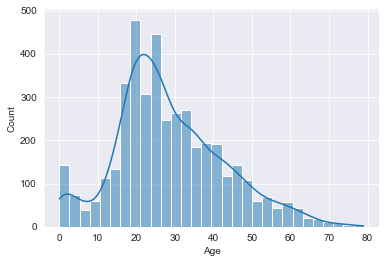

In [11]:
sns.histplot(data = test,x = 'Age', kde = True, bins = 30 );

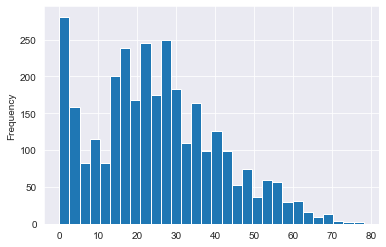

In [12]:
(df[(df['RoomService']==0) & (df['FoodCourt']==0) & (df['ShoppingMall']==0) & (df['Spa']==0) & (df['VRDeck']==0)]['Age']
 .plot.hist(by='Age',bins = 30));

There was a hypothesis on the distribution of age among passengers that the audience was not solvent (under 18 years old) does not spend on services. 

The hypothesis is not confirmed

## Planets

In [13]:
def pie_values(df,columns):
    counts = [[i for i in df[columns]].count(j) for j in df[columns].unique()]
    object_ = [i for i in df[columns].unique()]
    pie_pl = pd.DataFrame({'object_':object_, 'counts':counts})
    pie_pl = pie_pl.set_index('object_', drop = False)
    pie_pl.plot( kind ='pie', 
       y='counts', figsize=(6, 6), 
       autopct='%1.0f%%',colors = ['red','#E9D5DA','pink', 'steelblue'],
       radius= 1)
    plt.legend(object_)
    #plt.title ('Distribution of passengers by', fontsize = 16)
    plt.axis('off')
    plt.tight_layout();

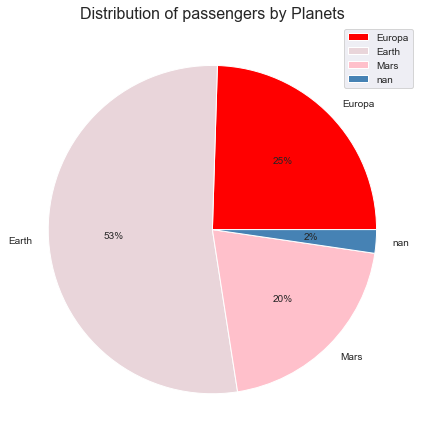

In [14]:
pie_values(df,'HomePlanet')
plt.title ('Distribution of passengers by Planets', fontsize = 16);

Most passengers from the ground. There are also missing values.

## СryoSleep

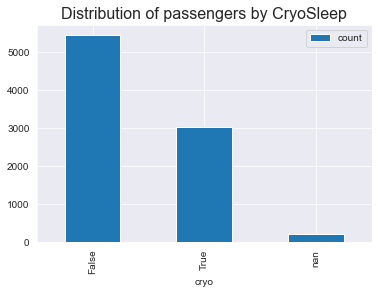

In [15]:
cryo_count = [[i for i in df['CryoSleep']].count(j) for j in df['CryoSleep'].unique()]
cryo = [i for i in df['CryoSleep'].unique()]
bar_cryo = pd.DataFrame ({'cryo':cryo, 'count':cryo_count})
bar_cryo.plot.bar(x = 'cryo', y ='count')
plt.title ('Distribution of passengers by CryoSleep', fontsize = 16);

In [16]:
transp_cryosleep = {
    'Transported without CryoSleep': (len(df.query("`CryoSleep` == False and `Transported` == True "))),
    'Not Transported without CryoSleep': (len(df.query("`CryoSleep` == False and `Transported` == False"))),
    'Transported with CryoSleep': (len(df.query("`CryoSleep` == True and `Transported` == True "))),
    'Not Transported with CryoSleep': (len(df.query("`CryoSleep` == True and `Transported` == False ")))
}
transp_cryosleep 

{'Transported without CryoSleep': 1789,
 'Not Transported without CryoSleep': 3650,
 'Transported with CryoSleep': 2483,
 'Not Transported with CryoSleep': 554}

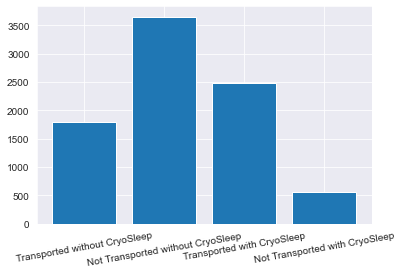

In [17]:
plt.bar(*zip(*transp_cryosleep.items()))
plt.xticks(rotation=10); 

Most of those who were not transported and did not sleep

More of those who were transported in a cryosleep than without.


## Destination 

In [18]:
df['Destination'].unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object)

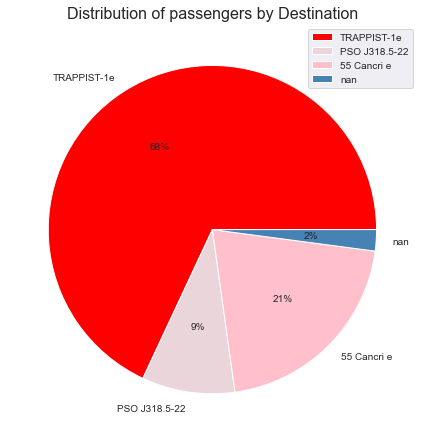

In [19]:
pie_values(df,'Destination')
plt.title ('Distribution of passengers by Destination', fontsize = 16);

Most prefer the planet TRAPPIST-1e

## VIP 

In [20]:
df['VIP'].unique()

array([False, True, nan], dtype=object)

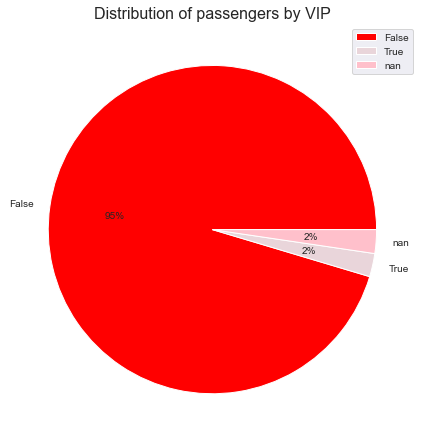

In [21]:
pie_values(df,'VIP')
plt.title ('Distribution of passengers by VIP', fontsize = 16);

VIP is not popular at all

## Cabin


In [22]:
cabin_pas = (df[['PassengerId','Cabin', 'Transported']].groupby(by = 'Cabin').agg({'PassengerId': 'count','Transported':'unique'})
             .reset_index()
             .sort_values(by='PassengerId', ascending = False))
cabin_pas.head(15)

,Cabin,PassengerId,Transported
6156,G/734/S,8,"[False, True]"
764,C/21/P,7,"[True, False]"
5092,G/1368/P,7,"[False, True]"
571,B/82/S,7,"[True, False]"
6527,G/981/S,7,[True]
654,C/137/S,7,"[False, True]"
2780,F/1411/P,7,"[True, False]"
5246,G/1476/S,7,"[False, True]"
312,B/201/P,7,"[False, True]"
1150,D/176/S,7,"[False, True]"


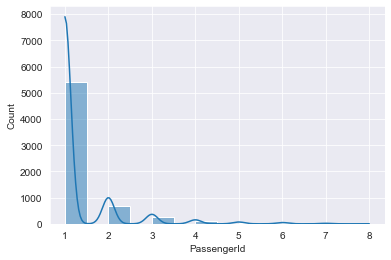

In [23]:
sns.histplot(data=cabin_pas, x="PassengerId",  kde=True);

Maximum occupancy in cabins is 8 people. 

In most cases, the cabins are single

## RoomService, FoodCourt, ShoppingMall, Spa, VRDeck

Mean by RoomService 224.687617481203


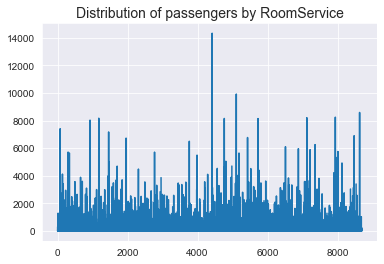

In [24]:
df['RoomService'].plot()
plt.title('Distribution of passengers by RoomService', fontsize = 14);
print('Mean by RoomService', df['RoomService'].mean())

In [25]:
df[(df['RoomService']>4000)]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
75,0082_01,Mars,False,F/16/P,TRAPPIST-1e,42.0,False,7406.0,0.0,0.0,0.0,0.0,Totse Datte,False
140,0160_01,Earth,False,G/22/P,TRAPPIST-1e,22.0,False,4119.0,0.0,0.0,0.0,61.0,Gory Atkinney,False
301,0334_01,Mars,False,F/62/S,TRAPPIST-1e,29.0,False,5715.0,2.0,211.0,1476.0,0.0,Unfly Mushe,False
338,0378_03,Europa,False,B/11/S,TRAPPIST-1e,79.0,False,5649.0,235.0,7.0,2579.0,2175.0,Naslon Pirejus,False
928,0992_04,Europa,False,NaN,55 Cancri e,35.0,True,8030.0,300.0,0.0,0.0,1436.0,Naosa Herpumble,False
930,0992_06,Europa,False,D/35/S,55 Cancri e,37.0,False,4301.0,791.0,0.0,1748.0,91.0,Weidus Kiling,False
1177,1243_02,Europa,False,A/9/P,TRAPPIST-1e,32.0,False,8168.0,69.0,11.0,371.0,0.0,Geno Oderient,False
1459,1542_01,Mars,False,F/299/S,TRAPPIST-1e,13.0,False,7172.0,0.0,157.0,20.0,0.0,Tot Seche,False
1467,1550_02,Europa,False,NaN,55 Cancri e,53.0,True,5022.0,2376.0,0.0,0.0,235.0,Coxaton Supiensive,False
1703,1810_01,Mars,False,F/356/P,TRAPPIST-1e,56.0,False,4694.0,0.0,2661.0,51.0,0.0,Whee Ruité,False


Insight was found, everyone who paid for RoomSersive more than 4000 was not transported!

Perhaps these cabins were in some kind of non-transportable wing

Mean by FoodCourt 458.07720329024676


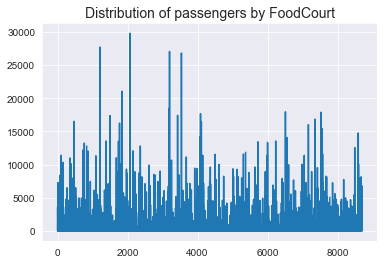

In [26]:
df['FoodCourt'].plot()
plt.title('Distribution of passengers by FoodCourt', fontsize = 14);
print('Mean by FoodCourt', df['FoodCourt'].mean())

In [27]:
df[df['FoodCourt'].isna()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
95,0103_01,Earth,False,F/24/S,TRAPPIST-1e,24.0,False,0.0,NaN,0.0,0.0,17.0,Arlen Mclainez,True
218,0232_01,Earth,True,G/36/S,PSO J318.5-22,27.0,False,0.0,NaN,0.0,0.0,0.0,Nica Bakerrison,False
367,0405_01,Earth,False,F/89/P,55 Cancri e,17.0,False,177.0,NaN,0.0,310.0,7.0,Denis Flowensley,False
385,0427_01,Europa,False,E/26/P,TRAPPIST-1e,31.0,False,417.0,NaN,7185.0,562.0,792.0,Algor Efulows,True
456,0498_01,Europa,True,NaN,55 Cancri e,27.0,False,0.0,NaN,0.0,0.0,0.0,Batomam Preent,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8396,8975_02,Earth,False,F/1840/P,TRAPPIST-1e,27.0,False,1.0,NaN,0.0,20.0,948.0,Inerry Goffey,False
8422,8997_01,Earth,True,F/1742/S,55 Cancri e,15.0,False,0.0,NaN,0.0,0.0,0.0,Dont Guerson,True
8460,9034_04,Europa,False,D/288/P,TRAPPIST-1e,60.0,False,0.0,NaN,947.0,668.0,1.0,NaN,True
8537,9116_01,Earth,False,F/1868/P,TRAPPIST-1e,26.0,False,0.0,NaN,0.0,1.0,48.0,Candra Franton,True


Mean by FoodCourt 173.72916912197996


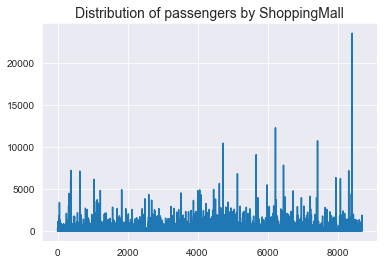

In [28]:
df['ShoppingMall'].plot()
plt.title('Distribution of passengers by ShoppingMall', fontsize = 14);
print('Mean by FoodCourt', df['ShoppingMall'].mean());

In [29]:
df[df['ShoppingMall']>8000]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
4724,5040_01,Europa,False,C/195/S,TRAPPIST-1e,26.0,False,0.0,21.0,10424.0,1373.0,7218.0,Enibik Dynigic,False
5673,6027_01,Europa,False,B/232/S,TRAPPIST-1e,36.0,False,0.0,1828.0,9058.0,1.0,2.0,Graviph Coweboded,True
6223,6583_01,Europa,False,B/254/S,TRAPPIST-1e,13.0,False,0.0,100.0,12253.0,6.0,80.0,Charda Sunlove,True
7425,7941_01,Europa,False,C/257/P,TRAPPIST-1e,41.0,False,0.0,116.0,10705.0,9181.0,10.0,Alrakan Apedishaft,False
8415,8989_01,Europa,False,B/291/P,TRAPPIST-1e,17.0,False,0.0,366.0,23492.0,356.0,3.0,NaN,True


Mean by Spa 311.1387779083431


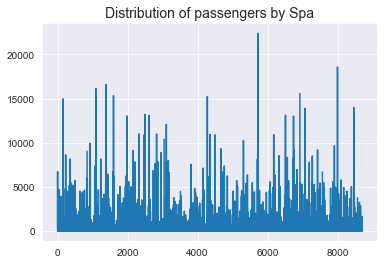

In [30]:
df['Spa'].plot()
plt.title('Distribution of passengers by Spa', fontsize = 14);
print('Mean by Spa', df['Spa'].mean());

In [31]:
df[df['Spa']>5000]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
154,0177_01,Europa,False,B/2/S,TRAPPIST-1e,38.0,False,0.0,10346.0,1.0,14970.0,2111.0,Toperon Iniouser,False
232,0248_01,Europa,False,C/10/S,TRAPPIST-1e,33.0,False,0.0,1.0,0.0,8620.0,1063.0,Genifi Spanxibus,False
336,0378_01,Europa,False,B/11/S,55 Cancri e,18.0,False,17.0,215.0,4.0,5132.0,697.0,Bram Pirejus,False
358,0395_01,Europa,False,B/17/P,55 Cancri e,31.0,True,0.0,11003.0,552.0,8157.0,5688.0,Meropus Hervel,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7906,8449_01,Europa,False,C/317/S,55 Cancri e,32.0,False,0.0,2154.0,0.0,9655.0,859.0,Arrain Purellliss,False
7995,8556_01,Europa,False,B/280/P,TRAPPIST-1e,18.0,False,0.0,1878.0,0.0,18572.0,10028.0,Mirfar Optionful,False
8097,8646_04,Europa,False,C/325/S,55 Cancri e,49.0,False,3.0,1108.0,2.0,5775.0,1964.0,Chamark Vertfull,False
8392,8970_01,Europa,False,C/300/P,55 Cancri e,28.0,False,NaN,3751.0,0.0,5025.0,11741.0,Batomam Clugeammy,False


Another insight , who spent more than 5000 on SPA did not Transported

Mean by VRDeck 304.8547912992357


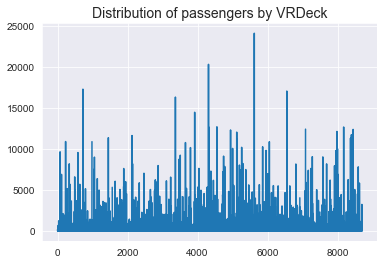

In [32]:
df['VRDeck'].plot()
plt.title('Distribution of passengers by VRDeck', fontsize = 14);
print('Mean by VRDeck', df['VRDeck'].mean());

In [33]:
df[df['VRDeck']>5000] #& (df['Transported']==True)]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
73,0078_01,Europa,False,C/4/S,TRAPPIST-1e,38.0,False,0.0,5840.0,0.0,321.0,9654.0,Spuri Pokerheed,False
113,0119_01,NaN,False,A/0/P,TRAPPIST-1e,39.0,False,0.0,2344.0,0.0,65.0,6898.0,Batan Coning,False
230,0245_02,Europa,False,C/6/P,TRAPPIST-1e,33.0,False,0.0,86.0,796.0,584.0,10912.0,Anchib Repumparte,False
275,0304_01,Europa,False,E/18/S,TRAPPIST-1e,28.0,False,0.0,422.0,0.0,1851.0,5166.0,Betena Ausivetpul,False
335,0377_01,Europa,False,C/15/S,55 Cancri e,63.0,False,0.0,1068.0,0.0,176.0,8188.0,Wezncha Excialing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8442,9015_01,Europa,False,B/344/S,55 Cancri e,41.0,False,3.0,1320.0,0.0,0.0,12392.0,Nunkino Perable,False
8487,9069_05,Europa,False,B/297/P,55 Cancri e,29.0,False,0.0,12563.0,0.0,3.0,5057.0,Mirfark Taketiatim,False
8588,9168_01,Europa,False,C/338/S,55 Cancri e,36.0,False,23.0,14773.0,0.0,1159.0,7819.0,Hadirk Cassiding,False
8604,9183_01,Europa,False,C/307/P,55 Cancri e,34.0,False,0.0,5.0,11.0,62.0,5804.0,NaN,False


Another insight , who spent more than 5000 on VRDeck did not Transported

In [34]:
# put a stub on the missing values in the columns service
for i in df[['RoomService','FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']]:
    df[i] = df[i].fillna(-1)

In [35]:
# put a stub on the missing values in the columns service
for i in test[['RoomService','FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']]:
    test[i] = test[i].fillna(-1)

In [36]:
for i in df[['RoomService','FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']]:
    print(i,df[df[i]!=-1][i].mean())

RoomService 224.687617481203
FoodCourt 458.07720329024676
ShoppingMall 173.72916912197996
Spa 311.1387779083431
VRDeck 304.8547912992357


In [37]:
for i in test[['RoomService','FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']]:
    print(i,test[test[i]!=-1][i].mean())

RoomService 219.26626936829558
FoodCourt 439.4842963318149
ShoppingMall 177.29552524527398
Spa 303.05244252873564
VRDeck 310.71003097450557


Values ​​have not changed significantly

I will create a new column with the sum of all services by passengers and build their distribution

In [38]:
df['sum_service'] = df['VIP'] + df['RoomService'] + df['FoodCourt'] + df['ShoppingMall'] + df['Spa']  + df ['VRDeck']
test['sum_service'] = test['VIP'] + test['RoomService'] + test['FoodCourt'] + test['ShoppingMall'] + test['Spa']  + test['VRDeck']

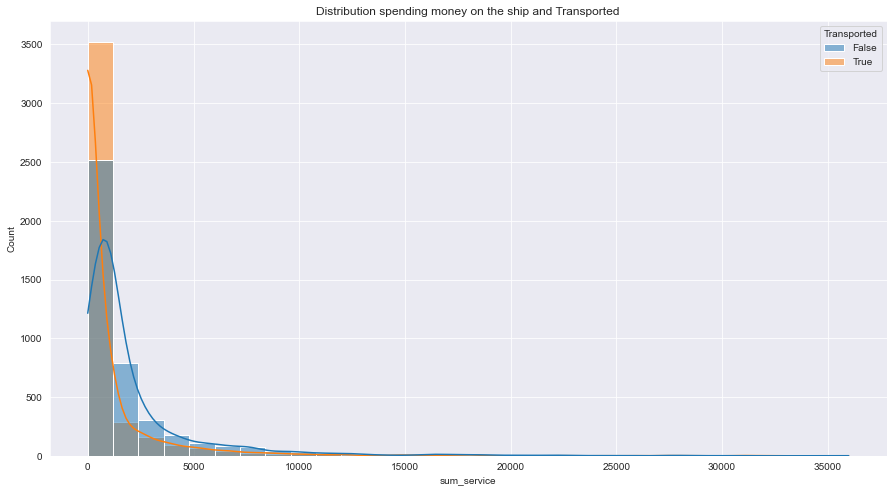

In [39]:
plt.figure(figsize=(15,8))
sns.histplot( data = df, x ='sum_service', bins=30, hue ='Transported', kde = True)
plt.title('Distribution spending money on the ship and Transported');

In [40]:
df[df['Transported']==True]['sum_service'].mean()

887.771408516612

In [41]:
df[df['Transported']==False]['sum_service'].mean()

2005.8707305502846


Untransported passengers spent twice as much money. Perhaps they were busy shopping and did not drink for transport )

## Preprocessing for machine learning

In [42]:
# put a stub on the missing values in the columns
def df_fillna1(df,columns):
    df[columns] = df[columns].fillna(-1)

df_fillna1(df,'Age')
df_fillna1(test,'Age')

df.loc[df['HomePlanet'].isnull(),'HomePlanet'] = stats.mode(df['HomePlanet'])[0][0]
df.loc[df['CryoSleep'].isnull(), 'CryoSleep'] = stats.mode(df['CryoSleep'])[0][0]
df.loc[df['Destination'].isnull(), 'Destination'] = stats.mode(df['Destination'])[0][0]
df.loc[df['Cabin'].isnull(), 'Cabin'] = stats.mode(df['Cabin'])[0][0]
    
moda = []
for i in df.VIP.mode().values:
    moda.append(i)

data = [df,test]
for dataset in data:
    dataset.VIP = dataset.VIP.fillna(moda[0])
    
df.loc[df['Name'].isnull(), 'Name'] = 'Unknown'
df.loc[df['Cabin'].isna(), 'Cabin'] = 'X/0/X'
    
df['sum_service'] =df['sum_service'].fillna(df['sum_service'].mean())    
test['sum_service'] =test['sum_service'].fillna(test['sum_service'].mean())

In [43]:
test.loc[test['HomePlanet'].isnull(),'HomePlanet'] = stats.mode(test['HomePlanet'])[0][0]
test.loc[test['CryoSleep'].isnull(), 'CryoSleep'] = stats.mode(test['CryoSleep'])[0][0]
test.loc[test['Destination'].isnull(), 'Destination'] = stats.mode(test['Destination'])[0][0]
test.loc[test['Cabin'].isnull(), 'Cabin'] = stats.mode(test['Cabin'])[0][0]
    

test.loc[test['Name'].isnull(), 'Name'] = 'Unknown'
test.loc[test['Cabin'].isna(), 'Cabin'] = 'X/0/X'   

In [44]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4277 non-null   object 
 2   CryoSleep     4277 non-null   object 
 3   Cabin         4277 non-null   object 
 4   Destination   4277 non-null   object 
 5   Age           4277 non-null   float64
 6   VIP           4277 non-null   bool   
 7   RoomService   4277 non-null   float64
 8   FoodCourt     4277 non-null   float64
 9   ShoppingMall  4277 non-null   float64
 10  Spa           4277 non-null   float64
 11  VRDeck        4277 non-null   float64
 12  Name          4277 non-null   object 
 13  sum_service   4277 non-null   float64
dtypes: bool(1), float64(7), object(6)
memory usage: 438.7+ KB


In [45]:
split = (df['Cabin'].str.split('/', expand = True)
        .rename(columns={0: 'level_cabin', 1: 'number_cabin', 2: 'side_cabin'}))
df = pd.concat ([df, split], axis = 1)
df.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,sum_service,level_cabin,number_cabin,side_cabin
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,10384.0,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,5176.0,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1091.0,F,1,S


In [46]:
split1 = (test['Cabin'].str.split('/', expand = True)
        .rename(columns={0: 'level_cabin', 1: 'number_cabin', 2: 'side_cabin'}))
test = pd.concat ([test, split1], axis = 1)
test.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,sum_service,level_cabin,number_cabin,side_cabin
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,0.0,G,3,S
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,2832.0,F,4,S
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,0.0,C,0,S
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,7418.0,C,1,S
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,645.0,F,5,S


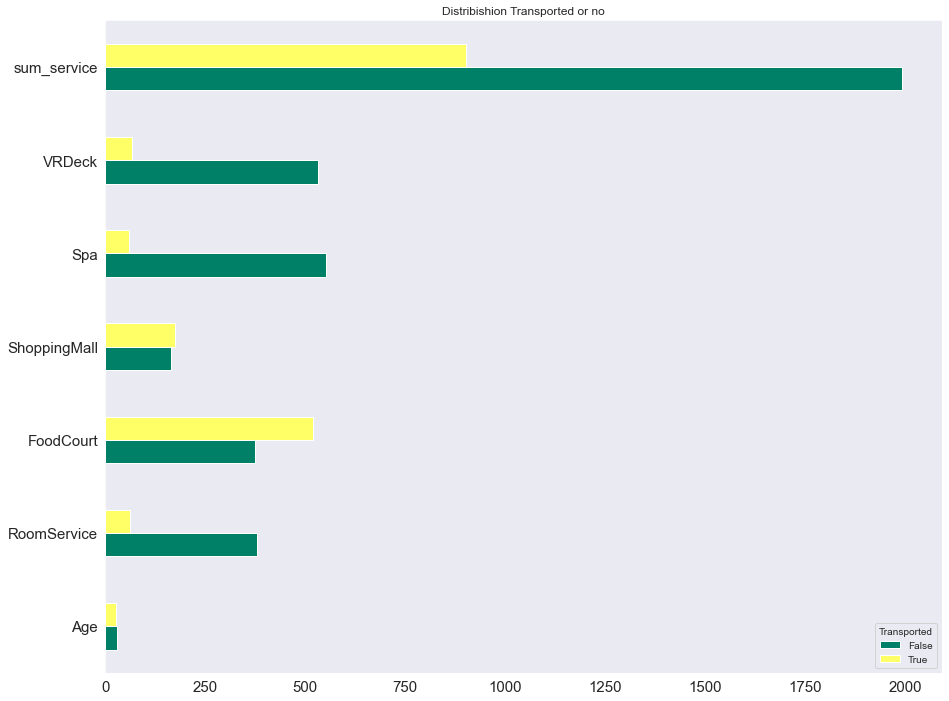

In [47]:
df_group = (df[['Age','RoomService','FoodCourt','ShoppingMall','Spa', 'VRDeck', 'sum_service','Transported']].groupby(by = 'Transported')
            .mean().transpose())
df_group.plot(kind ='barh', figsize =(15,12), fontsize = 15, cmap = 'summer', grid = False)
plt.title ('Distribishion Transported or no');

In [48]:
df_group = (df[['CryoSleep','Transported']].groupby(by = 'Transported')
            .count().transpose())
df_group

Transported,False,True
CryoSleep,4315,4378


In [49]:
df[['level_cabin','Transported']].groupby('level_cabin').apply(pd.DataFrame.mode).reset_index(drop=True)

,level_cabin,Transported
0,A,False
1,B,True
2,C,True
3,D,False
4,E,False
5,F,False
6,G,True
7,T,False


In [50]:
df[['side_cabin','Transported']].groupby('side_cabin').apply(pd.DataFrame.mode).reset_index(drop=True)

,side_cabin,Transported
0,P,False
1,S,True


In [51]:
df[['level_cabin','Transported']].groupby('level_cabin').apply(pd.DataFrame.mode).reset_index(drop=True)

,level_cabin,Transported
0,A,False
1,B,True
2,C,True
3,D,False
4,E,False
5,F,False
6,G,True
7,T,False


X is our stub when converting nan.

According to the most common values, it can be hypothesized that the people who will be transported are:

    level_cabin : B, C, G
    side_cabiin: S

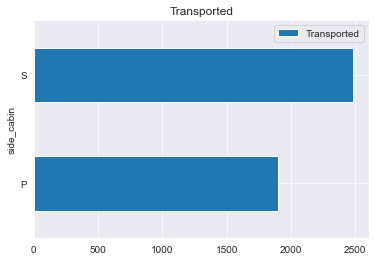

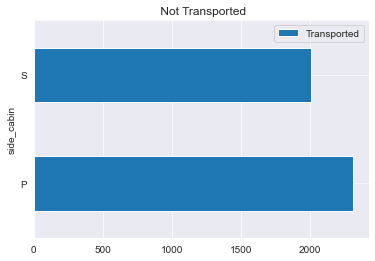

In [52]:
df[df['Transported']==True].groupby('side_cabin').count().reset_index().plot(kind='barh', x ='side_cabin', y='Transported',title ='Transported')
df[df['Transported']==False].groupby('side_cabin').count().reset_index().plot(kind='barh', x ='side_cabin', y='Transported',title =' Not Transported');

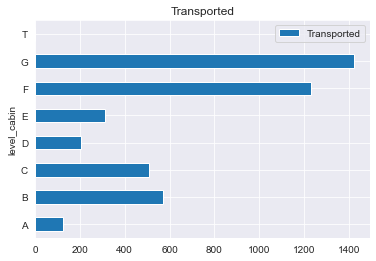

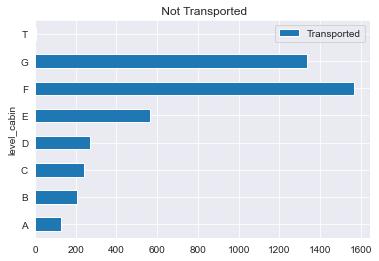

In [53]:
df[df['Transported']==True].groupby('level_cabin').count().reset_index().plot(kind='barh', x ='level_cabin', y='Transported',title ='Transported')
df[df['Transported']==False].groupby('level_cabin').count().reset_index().plot(kind='barh', x ='level_cabin', y='Transported',title =' Not Transported');

Transformation of attribute into a qualitative characteristic

In [54]:
HomePlanet = {'Europa':0, 'Earth':1, 'Mars':2}
data = [df,test]
for dataset in data:
    dataset.HomePlanet = dataset.HomePlanet.map(HomePlanet)

In [55]:
df.level_cabin.unique()

array(['B', 'F', 'A', 'G', 'E', 'D', 'C', 'T'], dtype=object)

In [56]:
for i in (df,test):
    i.Destination = i.Destination.replace ({'TRAPPIST-1e': 0, 'PSO J318.5-22': 1, '55 Cancri e': 2})
    i.level_cabin = i.level_cabin.replace({'A': 0 , 'B': 1, 'C': 2, 'F': 3, 'G':4, 'E':5, 'D': 6 ,'G':7, 'T':8})
    i.side_cabin = i.side_cabin.replace({'P': 0, 'S': 1})

In [57]:
#info_column(df)
#print()
#info_column(test)

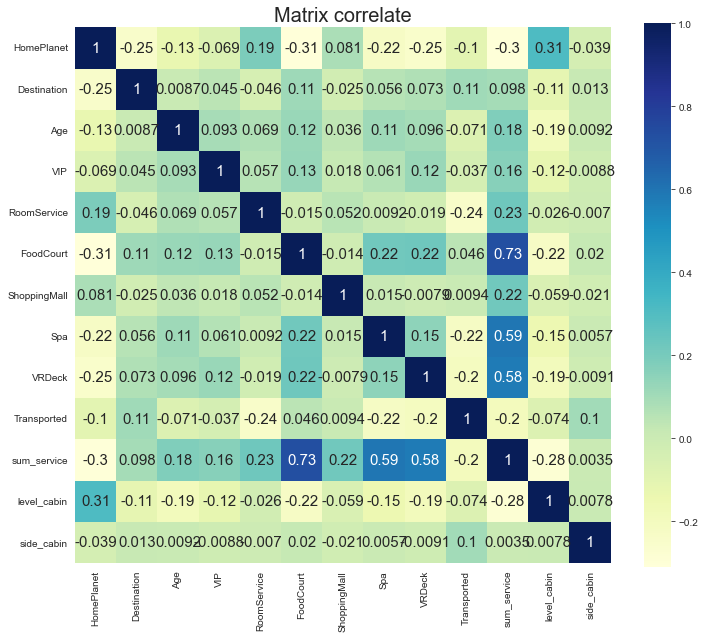

In [58]:
matrix_corr = df.corr()
plt.figure(figsize = (12,10))
matrix_corr
ax = sns.heatmap(matrix_corr,annot = True,square= True, annot_kws = {'size':15}, cmap="YlGnBu")
plt.title('Matrix correlate', fontsize = 20);

As previously revealed correlate RoomService and some service 

PlanetHome collerate more than age passenger

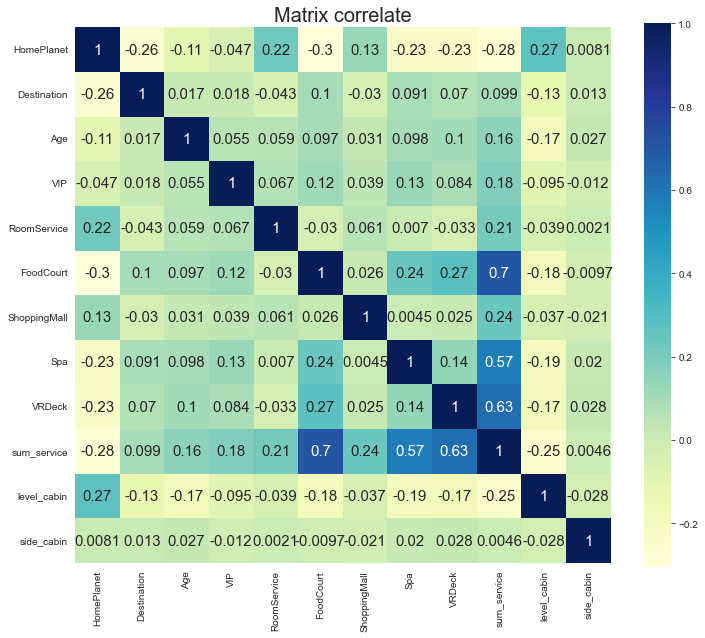

In [59]:
matrix_corr = test.corr()
plt.figure(figsize = (12,10))
matrix_corr
ax = sns.heatmap(matrix_corr,annot = True,square= True, annot_kws = {'size':15}, cmap="YlGnBu")
plt.title('Matrix correlate', fontsize = 20);

## Model Predections 

The beginning, we will make a prediction model based only on a test sample

In [60]:
X = df.drop(['Transported','Cabin', 'Name'], axis = 1)
y = df['Transported']

X_train, X_test, y_train, y_test = train_test_split( X, y , test_size = 0.3, random_state = 0 )
scaler = StandardScaler()

X_train_st = scaler.fit_transform(X_train)

X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)
#X_train_st.shape
model = LogisticRegression( solver ='liblinear', random_state = 0 )

model.fit (X_train_st, y_train)

probabilities = model.predict_proba(X_test_st)[:,1]

predictions = model.predict(X_test_st)

print('Metric for logistic regression:')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test,predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test,predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test,predictions)))
print('F1: {:.2f}'.format(f1_score(y_test,predictions)))

rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)
rf_model.fit(X_train_st,y_train)
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]

print('')
print('Metric for RandomForest')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test,rf_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, rf_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test,rf_predictions)))
print('F1: {:.2f}'.format(f1_score(y_test,rf_predictions)))

Metric for logistic regression:
Accuracy: 0.78
Precision: 0.76
Recall: 0.81
F1: 0.78

Metric for RandomForest
Accuracy: 0.81
Precision: 0.82
Recall: 0.79
F1: 0.80


Metric for RandomForest better

In [61]:
# Drop unncecessary columns
drop_col = ['Cabin', 'Name']
train_ = df.drop(columns = drop_col)
test_ = test.drop(columns = drop_col)

In [62]:
X = train_.drop(columns = ['Transported'])
y = train_[['PassengerId', 'Transported']]

In [63]:
y.head()

,PassengerId,Transported
0,0001_01,False
1,0002_01,True
2,0003_01,False
3,0003_02,False
4,0004_01,True


In [64]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures

le = LabelEncoder()
categories = ['HomePlanet', 'CryoSleep', 'Destination',
              'VIP', 'level_cabin', 'side_cabin']
encoded_ = []
test_enc = []

for col in categories:
    X_encoded = le.fit_transform(X[col])
    test_encoded = le.fit_transform(test_[col])
    encoded_.append(X_encoded)
    test_enc.append(test_encoded)

df_encoded = pd.DataFrame({'HomePlanet_': encoded_[0],
                           'Is_CryoSleep': encoded_[1],
                           'Destination_': encoded_[2],
                           'Is_VIP': encoded_[3],
                           'CabinDeck_': encoded_[4],
                           'CabinSide_': encoded_[5]})

df_test_encoded = pd.DataFrame({'HomePlanet_': test_enc[0],
                           'Is_CryoSleep': test_enc[1],
                           'Destination_': test_enc[2],
                           'Is_VIP': test_enc[3],
                           'CabinDeck_': test_enc[4],
                           'CabinSide_': test_enc[5]})

X = pd.concat([X, df_encoded], axis = 1)
X.drop(columns = categories, inplace = True)
test_ = pd.concat([test_, df_test_encoded], axis = 1)
test_.drop(columns = categories, inplace = True)
X.head()
# test_.head()

,PassengerId,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,sum_service,number_cabin,HomePlanet_,Is_CryoSleep,Destination_,Is_VIP,CabinDeck_,CabinSide_
0,0001_01,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0
1,0002_01,24.0,109.0,9.0,25.0,549.0,44.0,736.0,0,1,0,0,0,3,1
2,0003_01,58.0,43.0,3576.0,0.0,6715.0,49.0,10384.0,0,0,0,0,1,0,1
3,0003_02,33.0,0.0,1283.0,371.0,3329.0,193.0,5176.0,0,0,0,0,0,0,1
4,0004_01,16.0,303.0,70.0,151.0,565.0,2.0,1091.0,1,1,0,0,0,3,1


In [65]:


y_encoded = le.fit_transform(y['Transported'])
df_encoded = pd.DataFrame({'Transported_enc': y_encoded})
y = pd.concat([y, df_encoded], axis = 1)
y = y.drop(columns = ['Transported'])
y.head()



,PassengerId,Transported_enc
0,0001_01,0
1,0002_01,1
2,0003_01,0
3,0003_02,0
4,0004_01,1


In [66]:
# Setting PassengerId as the index
index_ = ['PassengerId']
X = X.set_index(index_)
y = y.set_index(index_)

In [67]:
test = test_.copy()
test = test.drop(columns = ['PassengerId'])

scaler = StandardScaler(with_mean = False, with_std = True)
scaled_ = scaler.fit_transform(X)
scaled_test = scaler.fit_transform(test)
scaled_ = pd.DataFrame(scaled_, columns = X.columns)
scaled_test = pd.DataFrame(scaled_test, columns = test.columns)
# scaled_.head()

poly_ = PolynomialFeatures(include_bias = False)
scaled_ = poly_.fit_transform(scaled_)
scaled_ = pd.DataFrame(scaled_)
scaled_.shape

(8693, 152)

poly_ = PolynomialFeatures(include_bias = False)
scaled_test = poly_.fit_transform(scaled_test)
scaled_test = pd.DataFrame(scaled_test)
scaled_test.shape



(4277, 119)

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(scaled_, y, test_size = 0.33,
                                                    random_state = 101)

log_reg = LogisticRegression(solver = 'liblinear')
log_reg.fit(X_train, np.ravel(y_train))

LogisticRegression(solver='liblinear')

predicted = log_reg.predict(X_test)



from sklearn.metrics import classification_report
print(classification_report(y_test, predicted))


from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
print(f"The model's accuracy score is {round(accuracy_score(y_test, predicted)*100, 2)}%")



              precision    recall  f1-score   support

           0       0.82      0.77      0.79      1429
           1       0.79      0.83      0.81      1440

    accuracy                           0.80      2869
   macro avg       0.80      0.80      0.80      2869
weighted avg       0.80      0.80      0.80      2869

The model's accuracy score is 79.96%


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

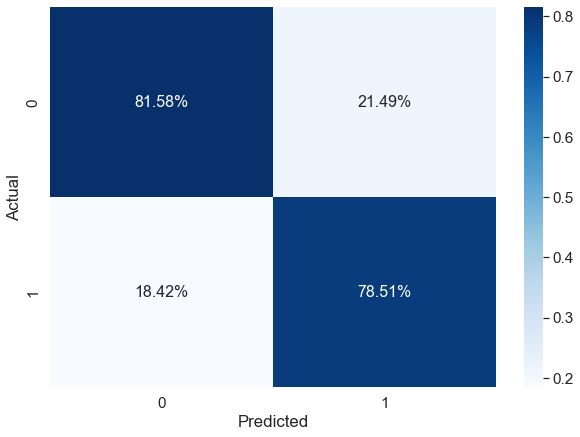

In [69]:
data = confusion_matrix(y_test, predicted)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(predicted))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm/np.sum(df_cm), cmap="Blues", annot=True,annot_kws={"size": 16}, fmt = '.2%')

In [70]:
submission = pd.DataFrame({
    'PassengerId' : test_['PassengerId'],
    'Transported' : log_reg.predict(scaled_test).astype(bool)
})

submission.to_csv('./submission1.csv', index = False)